<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/29%20-%20Modelisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mouhamadou KANE

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("base_projet.csv" , sep=";")
data.head()


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField  EmployeeNumber  \
0                 1        College  Life Sciences               1   
1                 8  Below College  Life Sciences               2   
2                 2        College          Other               4   
3                 3         Master  Life Sciences               5   
4                 2  Below College        Medical               7   

  EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                  Medium  ...                      Low             80   
1                    High  ...                Very High             80   
2               Very High  ...                   Medium             80   
3               Very High  ...                     High             80   
4                     Low  ...                Very High             80   

  StockOptionLevel  TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  \
0                0                  8                     0             Bad   
1                1                 10                     3          Better   
2                0                  7                     3          Better   
3                0                  8                     3          Better   
4                1                  6                     3          Better   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 34 columns]

#  TRAVAIL A FAIRE :

## Objectif :
- Comprendre du mieux possible nos données 
1. Choisir une métrique adéquate pour mesurer la performance des modèles
2. Développer un modèle de Machine Learning capable de prédire le churn.
## Checklist de base
#### Analyse de Forme :
- **variable target** : Attrition
- **lignes et colonnes** : 1470,34
- **types de variables** : qualitatives : 16 quantitatives  18

- **Analyse des valeurs manquantes** :
    - Pas de valeur manquantes 
#### Analyse de Fond :
- **Visualisation de la target** :
    - 16% de depart
 

- **Relation Variables / Target** :
    - target/ variables quantitatives:l'Age, JobLevel, TrainingTimesLastYear,PercentSalaryHike  semblent liés a l'attrition -> hypothese a tester
    - target/Variables qualitatives  : MaritalStatus , BusinessTravel , Over Time, Job Role    semblent liés a l'attrition -> hypothese a tester
       
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - certaines variables sont tres corrélées : +0.9 (a suveiller plus tard)



    

### Analyse de la forme des données

In [4]:
df = data.copy()

In [5]:
df.shape

(1470, 34)

In [6]:
df.dtypes.value_counts()

int64     18
object    16
dtype: int64

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Age                         0.0
YearsInCurrentRole          0.0
YearsAtCompany              0.0
WorkLifeBalance             0.0
TrainingTimesLastYear       0.0
TotalWorkingYears           0.0
StockOptionLevel            0.0
StandardHours               0.0
RelationshipSatisfaction    0.0
PerformanceRating           0.0
PercentSalaryHike           0.0
OverTime                    0.0
Over18                      0.0
NumCompaniesWorked          0.0
MonthlyRate                 0.0
MonthlyIncome               0.0
MaritalStatus               0.0
JobSatisfaction             0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
YearsSinceLastPromotion     0.0
EducationField              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole 

## Analyse du Fond
### 1. Visualisation initiale 

### Examen de la colonne target

In [8]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

## Relation Target / Variables
### Création de sous-ensembles depart et restant

In [9]:
depart_df = df[df['Attrition'] == 'Yes']

In [10]:
Restant_df = df[df['Attrition'] == 'No']

## Target / Variables quatitatives

C:\Users\Seydina mouhamed\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Seydina mouhamed\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


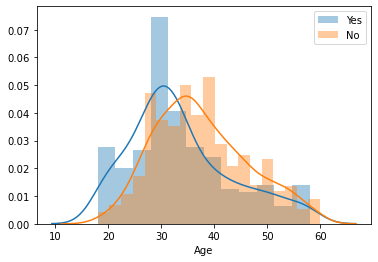

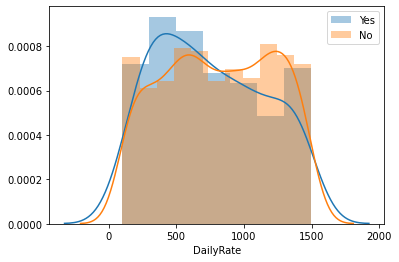

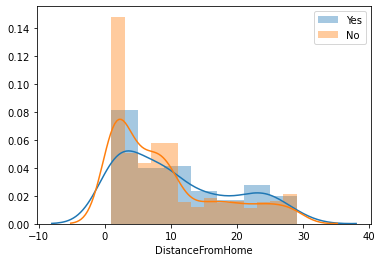

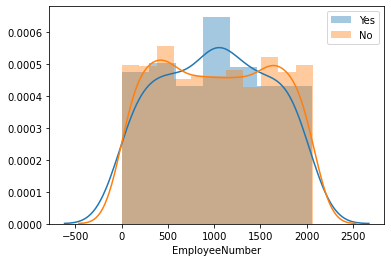

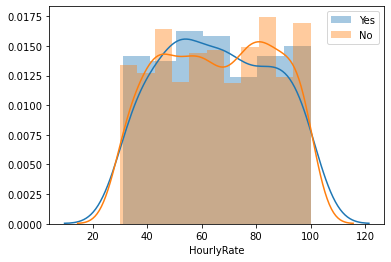

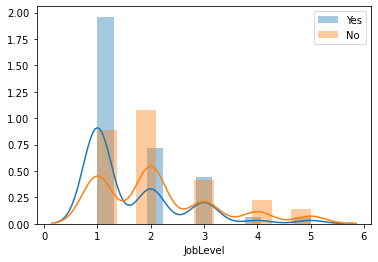

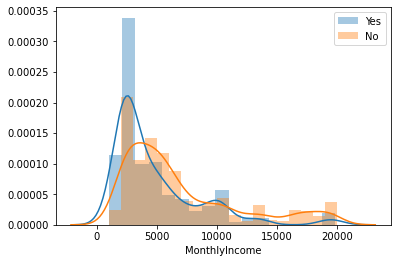

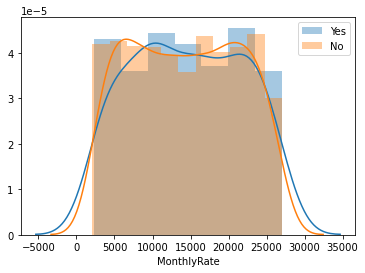

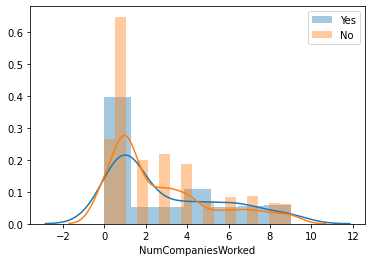

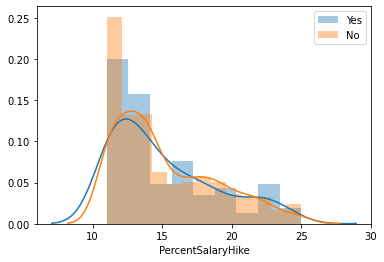

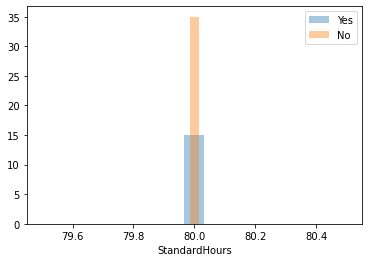

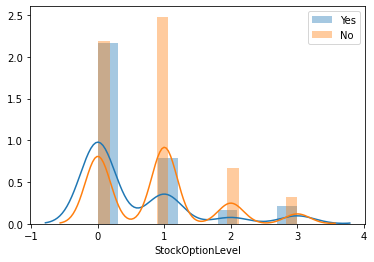

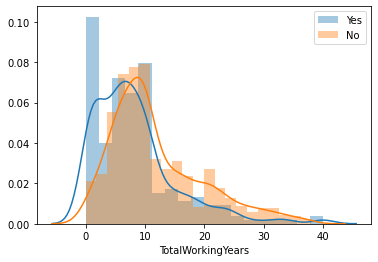

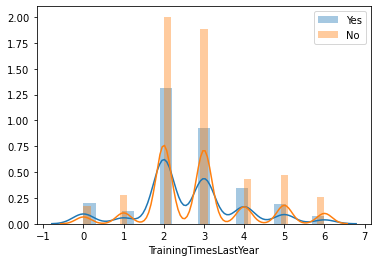

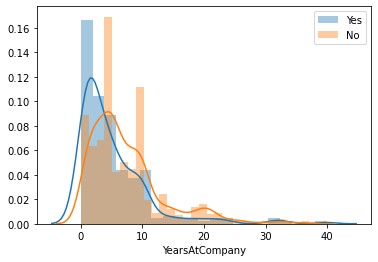

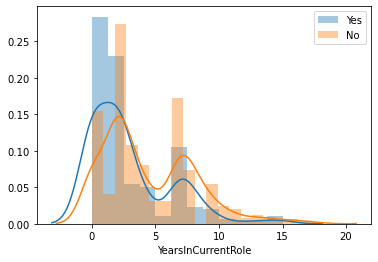

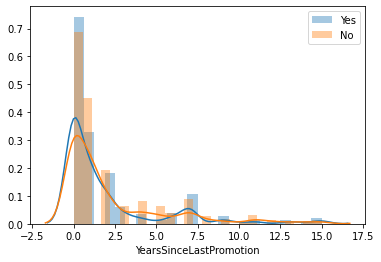

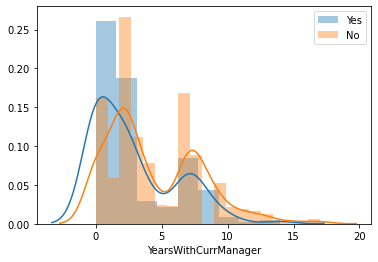

In [11]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(depart_df[col], label='Yes')
    sns.distplot(Restant_df[col], label='No')
    plt.legend()

## Target / Variables qualitatives

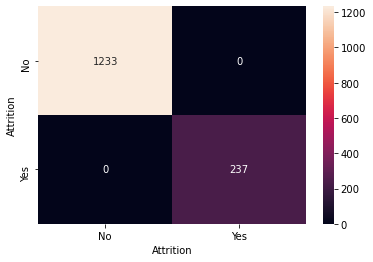

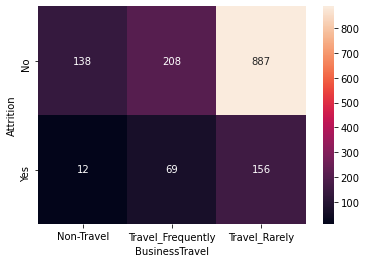

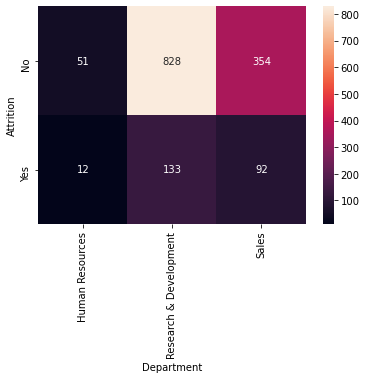

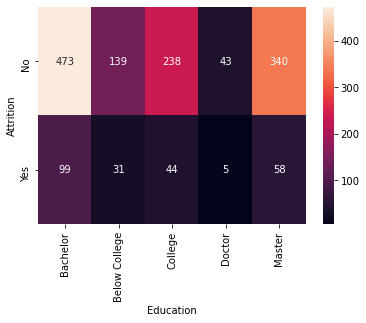

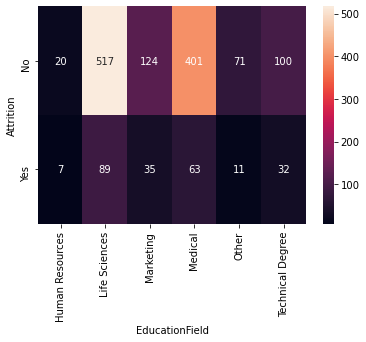

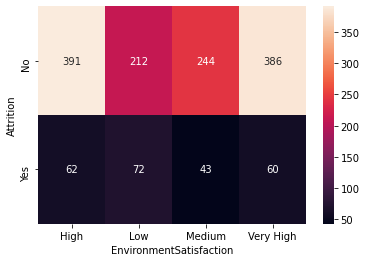

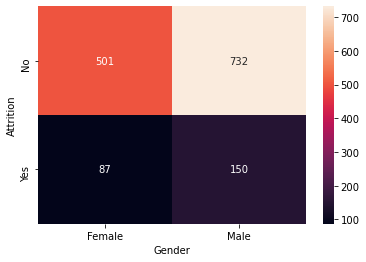

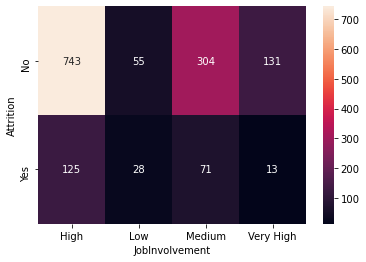

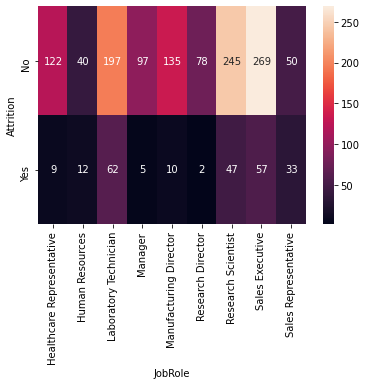

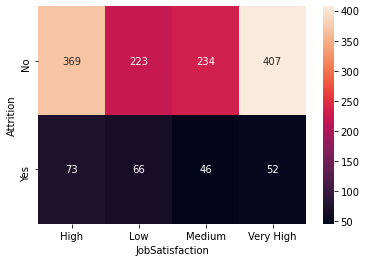

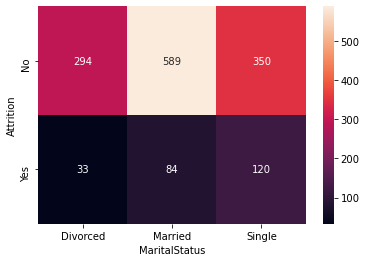

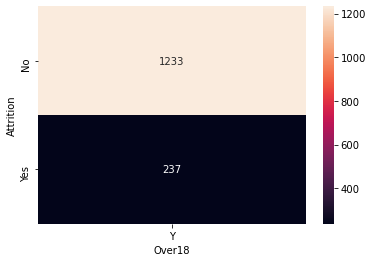

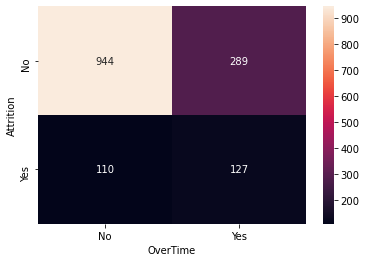

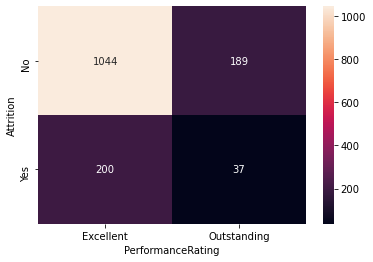

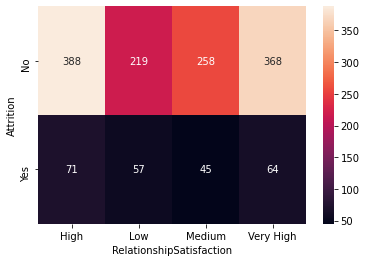

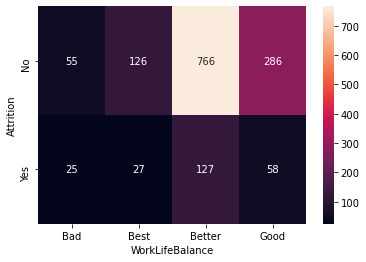

In [12]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['Attrition'], df[col]), annot=True, fmt='d')

## Analyse un peu plus Avancée
### Relation Variables / Variables

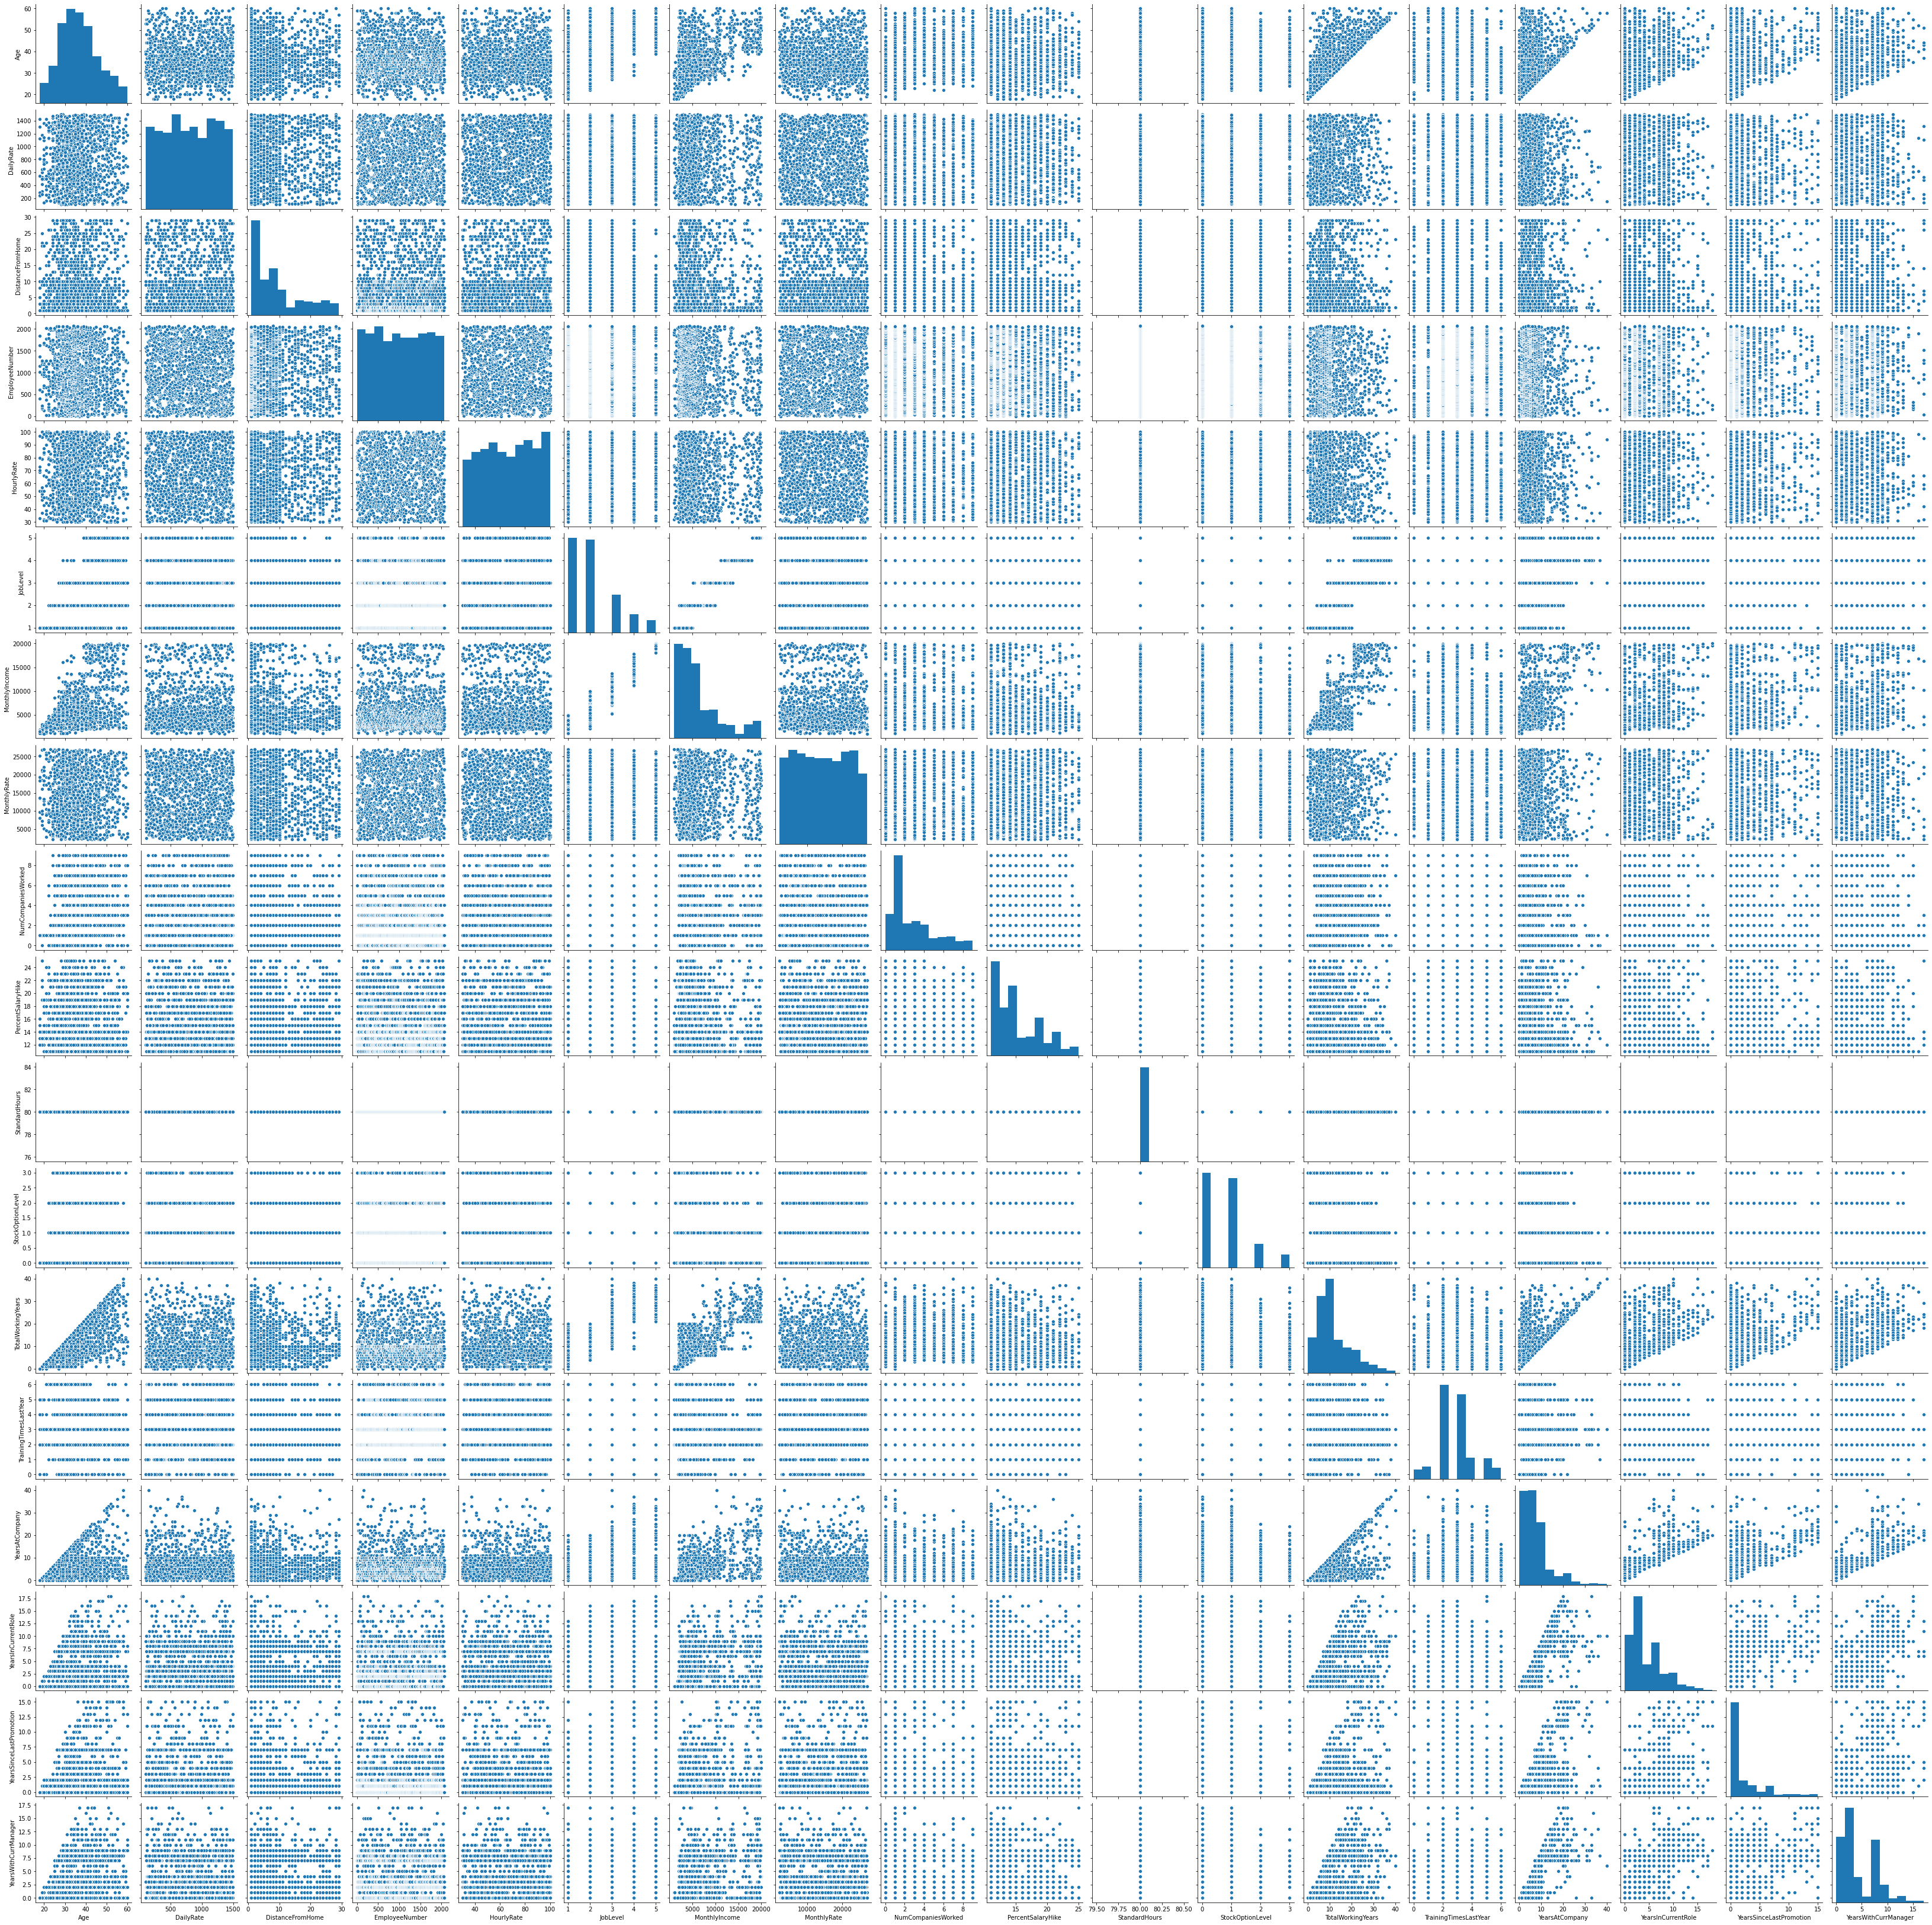

In [13]:
sns.pairplot(df.select_dtypes('int64'))

In [14]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField  EmployeeNumber  \
0                 1        College  Life Sciences               1   
1                 8  Below College  Life Sciences               2   
2                 2        College          Other               4   
3                 3         Master  Life Sciences               5   
4                 2  Below College        Medical               7   

  EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                  Medium  ...                      Low             80   
1                    High  ...                Very High             80   
2               Very High  ...                   Medium             80   
3               Very High  ...                     High             80   
4                     Low  ...                Very High             80   

  StockOptionLevel  TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  \
0                0                  8                     0             Bad   
1                1                 10                     3          Better   
2                0                  7                     3          Better   
3                0                  8                     3          Better   
4                1                  6                     3          Better   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 34 columns]

In [15]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Attrition----------------------------------------- ['Yes' 'No']
BusinessTravel------------------------------------ ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department---------------------------------------- ['Sales' 'Research & Development' 'Human Resources']
Education----------------------------------------- ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
EducationField------------------------------------ ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction--------------------------- ['Medium' 'High' 'Very High' 'Low']
Gender-------------------------------------------- ['Female' 'Male']
JobInvolvement------------------------------------ ['High' 'Medium' 'Very High' 'Low']
JobRole------------------------------------------- ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


## supression des variable Over18,StandardHours et EmployeeNumber



In [16]:
df = df.drop('Over18',axis=1)

In [17]:
df = df.drop('StandardHours', axis=1)

In [18]:
df = df.drop('EmployeeNumber', axis=1)

In [19]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                    1        College  Life Sciences                  Medium   
1                    8  Below College  Life Sciences                    High   
2                    2        College          Other               Very High   
3                    3         Master  Life Sciences               Very High   
4                    2  Below College        Medical                     Low   
...                ...            ...            ...                     ...   
1465                23        College        Medical                    High   
1466                 6  Below College        Medical               Very High   
1467                 4       Bachelor  Life Sciences                  Medium   
1468                 2       Bachelor        Medical               Very High   
1469                 8       Bachelor        Medical                  Medium   

      Gender  ...  PerformanceRating RelationshipSatisfaction  \
0     Female  ...          Excellent                      Low   
1       Male  ...        Outstanding                Very High   
2       Male  ...          Excellent                   Medium   
3     Female  ...          Excellent                     High   
4       Male  ...          Excellent                Very High   
...      ...  ...                ...                      ...   
1465    Male  ...          Excellent                     High   
1466    Male  ...          Excellent                      Low   
1467    Male  ...        Outstanding                   Medium   
1468    Male  ...          Excellent                Very High   
1469    Male  ...          Excellent                      Low   

      StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
0                    0                 8                     0   
1                    1                10                     3   
2                    0                 7                     3   
3                    0                 8                     3   
4                    1                 6                     3   
...                ...               ...                   ...   
1465                 1                17                     3   
1466                 1                 9                     5   
1467                 1                 6                     0   
1468                 0                17                     3   
1469                 0                 6                     3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                Bad               6                   4   
1             Better              10                   7   
2             Better               0                   0   
3             Better               8                   7   
4             Better               2                   2   
...              ...             ...                 ...   
1465          Better               5                   2   
1466          Better               7                   7   
1467  

## dataset  - Encodage

In [20]:
def encodage(df):
    code = { 'Female':0 ,'Male':1,'Yes':0,'No':1,'Below College':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5,
            'Low':1,'Medium':2,'High':3,'Very High':4, 
            'Good':2,'Excellent':3,'Outstanding':4,'Bad':1,'Better':3,'Best':4,
           'Travel_Rarely':1 ,'Travel_Frequently':2, 'Non-Travel':3,
           'Sales':1,'Research & Development':2,'Human Resources':3,
           'Life Sciences':0 ,'Other':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4,'Human Resources':5,
           'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2,'Manufacturing Director':3,
        'Healthcare Representative':4,'Manager':5,'Sales Representative':6, 'Research Director':7, 'Human Resources':8,
           'Single':0, 'Married':1, 'Divorced':2}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df


In [21]:
df = encodage(df)

In [22]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          0               1       1102           1                 1   
1   49          1               2        279           2                 8   
2   37          0               1       1373           2                 2   
3   33          1               2       1392           2                 3   
4   27          1               1        591           2                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               0                        2       0  ...   
1          1               0                        3       1  ...   
2          2               1                        4       1  ...   
3          4               0                        4       0  ...   
4          1               2                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)

In [25]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Feature Selection

## 2. SelectKBest

In [26]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [27]:
#chi2(X, y)

In [28]:
selector = SelectKBest(f_classif, k=20)
selector.fit(X, y)
selector.scores_

array([3.81758868e+01, 7.99037980e-06, 4.72663984e+00, 2.22492130e-01,
       8.96827659e+00, 1.44630813e+00, 8.54234203e+00, 1.58552091e+01,
       1.27458707e+00, 6.87959777e-02, 2.52419850e+01, 4.32153438e+01,
       1.14609776e+00, 1.58900038e+01, 3.95997626e+01, 3.84888190e+01,
       3.37916458e-01, 2.78228670e+00, 9.46564571e+01, 2.66728169e-01,
       1.22503955e-02, 3.09557636e+00, 2.81405009e+01, 4.42524914e+01,
       5.21164607e+00, 6.02611616e+00, 2.70016238e+01, 3.88383028e+01,
       1.60221841e+00, 3.67123115e+01])

In [29]:
np.array(X.columns)[selector.get_support()]

array(['Age', 'DailyRate', 'DistanceFromHome', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'], dtype=object)

In [30]:
X=df[np.array(X.columns)[selector.get_support()]]

In [31]:
X

Age  DailyRate  DistanceFromHome  EducationField  \
0      41       1102                 1               0   
1      49        279                 8               0   
2      37       1373                 2               1   
3      33       1392                 3               0   
4      27        591                 2               2   
...   ...        ...               ...             ...   
1465   36        884                23               2   
1466   39        613                 6               2   
1467   27        155                 4               0   
1468   49       1023                 2               2   
1469   34        628                 8               2   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                           2               3         2                4   
1                           3               2         2                2   
2                           4               2         1                3   
3                           4               3         1                3   
4                           1               3         1                2   
...                       ...             ...       ...              ...   
1465                        3               4         2                4   
1466                        4               2         3                1   
1467                        2               4         2                2   
1468                        4               2         2                2   
1469                        2               4         2                3   

      MaritalStatus  MonthlyIncome  NumCompaniesWorked  OverTime  \
0                 0           5993                   8         0   
1                 1           5130                   1         1   
2                 0           2090                   6         0   
3                 1           2909                   1         0   
4                 1           3468                   9         1   
...             ...            ...                 ...       ...   
1465              1           2571                   4         1   
1466              1           9991                   4         1   
1467              1           6142                   1         0   
1468              1           5390                   2         1   
1469              1           4404                   2         1   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                1               6   
1                         3                3              10   
2                         3                3               0   
3                         3                3               8   
4                         3                3               2   
...                     ...              ...             ...   
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                  

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1102, 20)
Test set: (368, 20)


In [33]:
trainset['Attrition'].value_counts()

1    923
0    179
Name: Attrition, dtype: int64

In [34]:
testset['Attrition'].value_counts()

1    310
0     58
Name: Attrition, dtype: int64

In [35]:
#STandarisation des donnees de training and testing 
#c pour donner le meme poid aux variables 
from sklearn import preprocessing 
std=preprocessing.StandardScaler().fit(X)
X_train= std.transform(X_train)
X_test= std.transform(X_test)

## Procédure d'évaluation

In [36]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [37]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

## Modellisation

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [39]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=5))

In [40]:
#classifier = LogisticRegression(random_state = 0)
from sklearn.linear_model import LogisticRegression

RandomForest =  RandomForestClassifier(random_state=0)
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
LogisticRegression=  make_pipeline(preprocessor,StandardScaler(),LogisticRegression())

In [41]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN,
                  'LogisticRegression': LogisticRegression
                 }

RandomForest
[[ 14  49]
 [  3 302]]
              precision    recall  f1-score   support

           0       0.82      0.22      0.35        63
           1       0.86      0.99      0.92       305

    accuracy                           0.86       368
   macro avg       0.84      0.61      0.64       368
weighted avg       0.85      0.86      0.82       368

AdaBoost
[[  7  56]
 [  7 298]]
              precision    recall  f1-score   support

           0       0.50      0.11      0.18        63
           1       0.84      0.98      0.90       305

    accuracy                           0.83       368
   macro avg       0.67      0.54      0.54       368
weighted avg       0.78      0.83      0.78       368

SVM
[[  7  56]
 [  3 302]]
              precision    recall  f1-score   support

           0       0.70      0.11      0.19        63
           1       0.84      0.99      0.91       305

    accuracy                           0.84       368
   macro avg       0.77      0.55

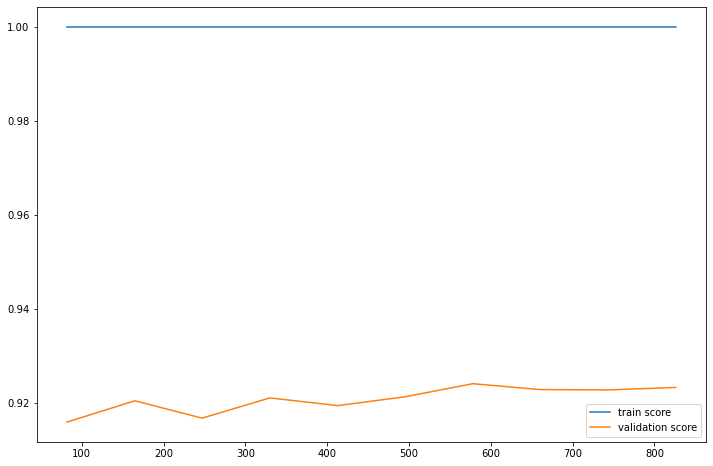

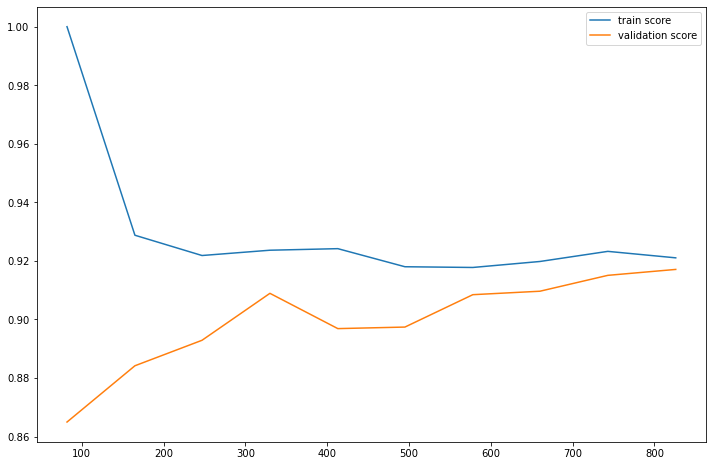

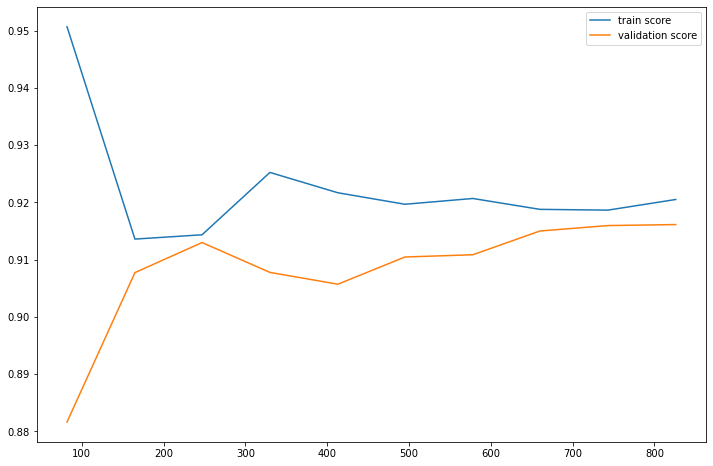

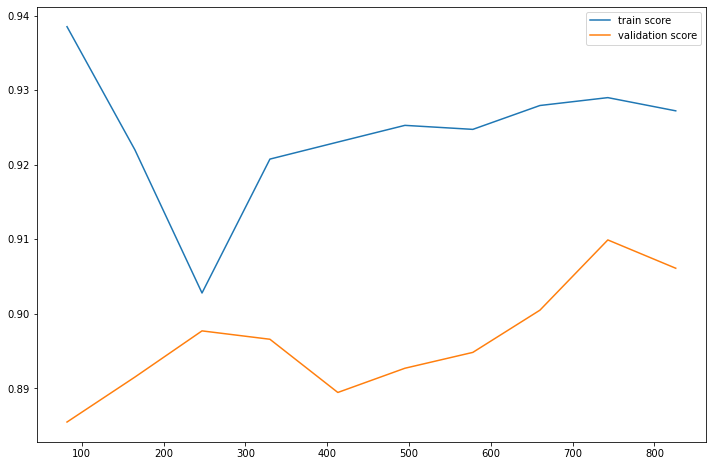

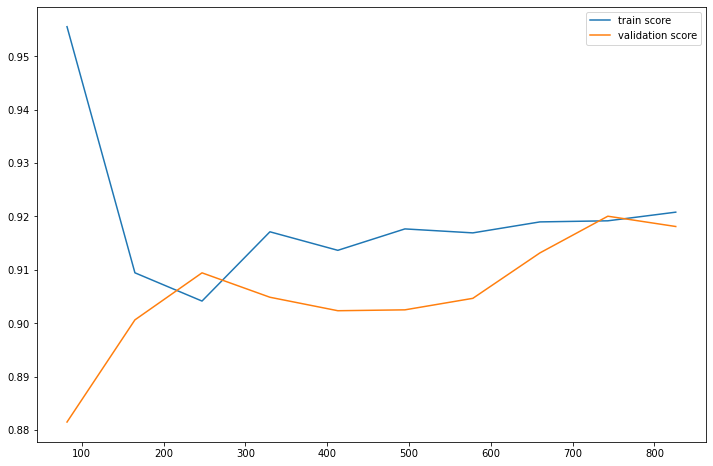

In [42]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## OPTIMISATION

In [43]:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier(n_estimators=300)

params = { 'max_depth' : range(5,20),
          'min_samples_split' : np.arange(2,10)
}
model_final = GridSearchCV(estimator, params, cv=5,verbose=True,n_jobs=-1,scoring='f1')

In [44]:
model_final.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=300),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1', verbose=True)

In [45]:
y_pred=model_final.predict(X_test)

In [46]:
f1_score(y_test,y_pred)

0.9154078549848943

In [47]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.9934426229508196

Text(0.5, 87.0, 'Ground Truth')

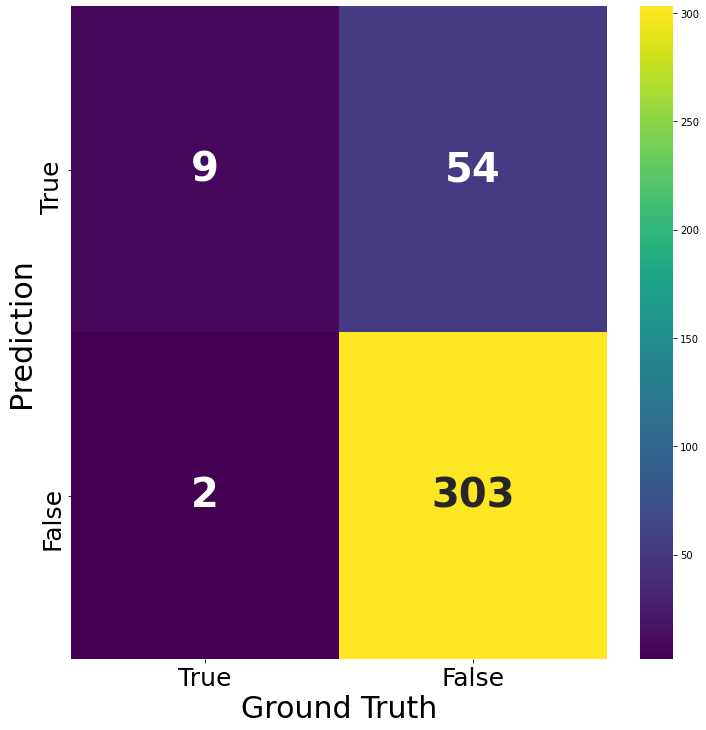

In [48]:
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True','False']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.14      0.24        63
           1       0.85      0.99      0.92       305

    accuracy                           0.85       368
   macro avg       0.83      0.57      0.58       368
weighted avg       0.84      0.85      0.80       368



In [50]:
from sklearn.metrics import recall_score

In [51]:
f1_score(y_test, y_pred)

0.9154078549848943

In [52]:
recall_score(y_test, y_pred)

0.9934426229508196

# Deploiement 

In [64]:
import pickle
pickle.dump(model_final,open('model.pkl','wb'))
